# Dimensionality Reduction Using PCA and LDA

# practice Session


## Demo - 5.1: Dimensionality Reduction - Customer Segmentation

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer
from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from ipywidgets import interact
import ipywidgets as widgets
import seaborn as sns


### Loading Data

In [2]:
from sklearn.datasets import load_wine
data = load_wine()
df = pd.DataFrame(data=data.data, columns=data.feature_names)

df['target'] = pd.Series(data.target)

#the data from load_wine is numpy array. here it is converted to a dataframe

In [3]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
#finding frequency of class labels
df['target'].value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

### Preprocessing Data

In [5]:
#checking for missing values
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [7]:

#target and features
X=(df.iloc[:,:-1])
y=(df.iloc[:,-1])

#df.iloc[row_start:row_end , col_start, col_end]

In [8]:
# Defining method to perform data scaling operation based on the type of scaling
def feature_scale(scale):
 numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
 new_data_df = X.select_dtypes(include=numerics)
 
 if scale == 'minmax':
     scaler = MinMaxScaler()
 else:
     scaler = StandardScaler()
 df_scaled = pd.DataFrame(scaler.fit_transform(new_data_df.to_numpy()),columns=new_data_df.columns)
 return df_scaled

In [9]:
# scaling the data using MinMax Scaling process
scale = 'MinMax' 
data_df_scaled=feature_scale(scale)
data_df_scaled
data_df1=data_df_scaled
data_df1.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
5,1.481555,-0.517367,0.305159,-1.289707,0.860705,1.562093,1.366128,-0.176095,0.664217,0.731870,0.406051,0.336606,2.239039
6,1.716255,-0.418624,0.305159,-1.469878,-0.262708,0.328298,0.492677,-0.498407,0.681738,0.083015,0.274431,1.367689,1.729520
7,1.308617,-0.167278,0.890014,-0.569023,1.492625,0.488531,0.482637,-0.417829,-0.597284,-0.003499,0.449924,1.367689,1.745442
8,2.259772,-0.625086,-0.718336,-1.650049,-0.192495,0.808997,0.954502,-0.578985,0.681738,0.061386,0.537671,0.336606,0.949319
9,1.061565,-0.885409,-0.352802,-1.049479,-0.122282,1.097417,1.125176,-1.143031,0.453967,0.935177,0.230557,1.325316,0.949319


In [10]:
# target and features of the scaled data
X1=data_df1
y1=(df.iloc[:,-1])

#df.iloc[row_start:row_end , col_start, col_end]

### Task 2

### Dimensionality reduction techniques using PCA and LDA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#PCA
pca = PCA(n_components=2)
X_r = pca.fit(X1).transform(X1)
explained_variance = pca.explained_variance_ratio_
explained_variance

In [34]:


#LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X1, y1).transform(X1)
#n_components cannot be larger than min(n_features, n_classes - 1).
#In this case, no.of classes is 3, so n_components can only be 2. as min(n_features,2)

In [32]:
X_r2

array([[-4.70024401,  1.97913835],
       [-4.30195811,  1.17041286],
       [-3.42071952,  1.42910139],
       [-4.20575366,  4.00287148],
       [-1.50998168,  0.4512239 ],
       [-4.51868934,  3.21313756],
       [-4.52737794,  3.26912179],
       [-4.14834781,  3.10411765],
       [-3.86082876,  1.95338263],
       [-3.36662444,  1.67864327],
       [-4.80587907,  2.23536271],
       [-3.42807646,  2.17510939],
       [-3.66610246,  2.26248961],
       [-5.58824635,  2.05478773],
       [-5.50131449,  3.61304865],
       [-3.18475189,  2.88952528],
       [-3.28936988,  2.76584266],
       [-2.99809262,  1.42511132],
       [-5.24640372,  3.70982655],
       [-3.13653106,  1.97689922],
       [-3.57747791,  0.5624599 ],
       [-1.69077135,  0.91342136],
       [-4.83515033,  0.9147628 ],
       [-3.09588961,  0.61735888],
       [-3.32164716,  0.29847734],
       [-2.14482223,  0.16369247],
       [-3.9824285 ,  2.17515679],
       [-2.68591432,  1.21850924],
       [-3.56309464,

### Visualization of PCA and LDA

Text(0.5, 1.0, 'PCA of Wine dataset')

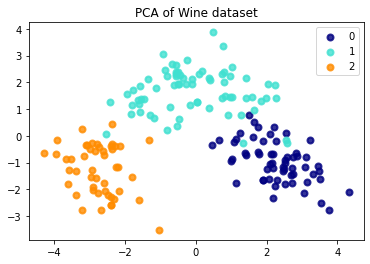

In [12]:
plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2
target_names=[0,1,2]
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of Wine dataset")


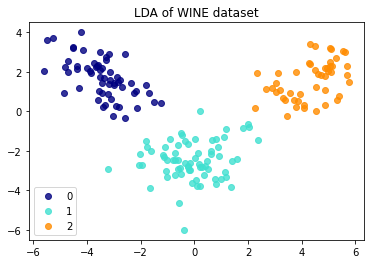

In [13]:
plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of WINE dataset")

plt.show()

### Inference

Looking at both PCA and LDA model, for this data LDA is good compared to PCA as it has Inter cluster distance is more

### Task 3

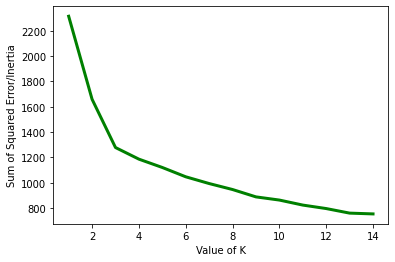

In [14]:
#Finding optimal value of k
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X1)
    # calculates squared error
    # for the clustered points
    Sum_of_squared_distances.append(km.inertia_)
     
# plot the cost against K values
plt.plot(K, Sum_of_squared_distances, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Sum of Squared Error/Inertia")
plt.show()

# MOdelling using K means
#k=3 here

# without Dimensionality reduction

In [15]:
Kmeans_model_wo = KMeans(n_clusters=3)
Kmeans_model_wo.fit(data_df1)

KMeans(n_clusters=3)

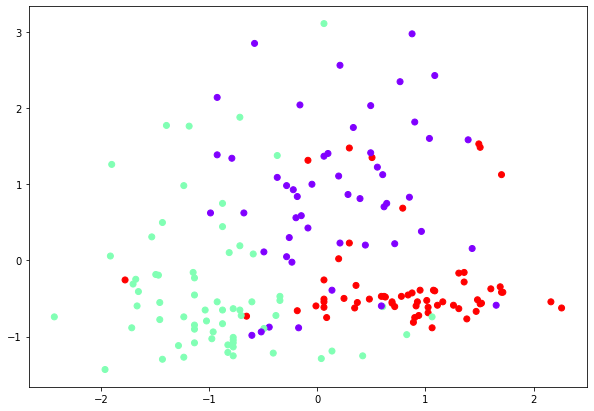

In [16]:
plt.figure(figsize=(10, 7))

plt.scatter(data_df1['alcohol'], data_df1['malic_acid'], c=Kmeans_model_wo.labels_, cmap='rainbow')

In [17]:
### K means with Dimensionality reduction-PCA

In [18]:
Kmeans_model_w = KMeans(n_clusters=3)
Kmeans_model_w.fit(X_r)

KMeans(n_clusters=3)

Text(0.5, 1.0, 'Kmeans clustering on PCA reduced components')

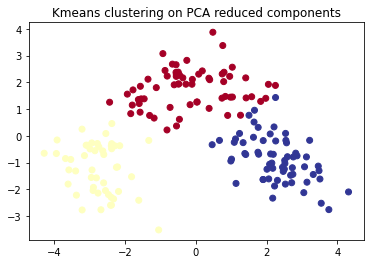

In [19]:
y=Kmeans_model_w.labels_
plt.scatter(X_r[:, 0], X_r[:, 1], c=y,cmap='RdYlBu')
plt.title('Kmeans clustering on PCA reduced components')

#### Using DBSCAN Clustering Algorithm

Text(0, 0.5, 'Epsilon')

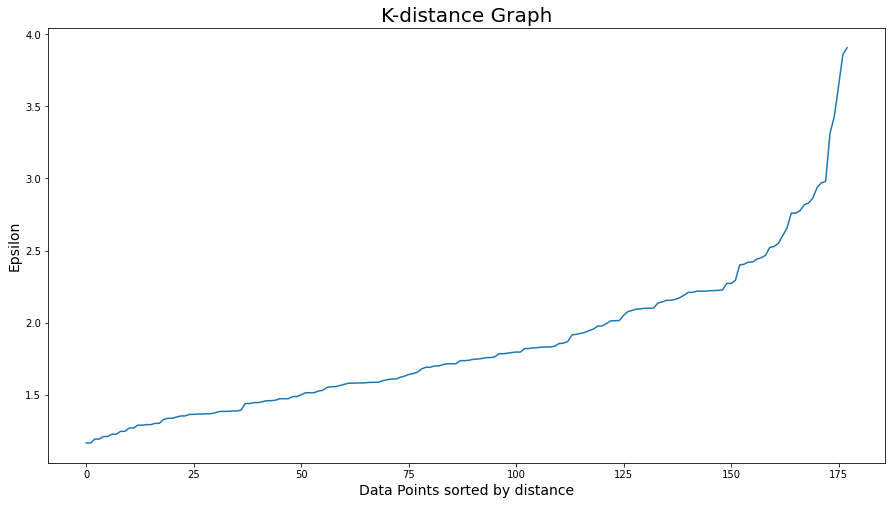

In [20]:
#finding optimal value of eps and min points

from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(data_df1)
distances, indices = nbrs.kneighbors(data_df1)
# Plotting K-distance Graph
import numpy as np
distances = np.sort(distances, axis=0)
# distance variable contains an array of distances between a data point and rest of points
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
#plt.axhline(y=0.075, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)

In [21]:

eps=2.5
K=range(3,20)
for min_samples in K:
  clusterer = DBSCAN(eps=eps, min_samples=min_samples)
  cluster_labels = clusterer.fit_predict(data_df1)
  x= cluster_labels +2
  y = np.bincount(x)
  ii = np.nonzero(y)[0]
  results = list(zip(ii,y[ii]) )
  #print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', (results))
  print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', len(results))

eps= 2.5 | min_samples=  3 | obtained clustering:  2
eps= 2.5 | min_samples=  4 | obtained clustering:  2
eps= 2.5 | min_samples=  5 | obtained clustering:  2
eps= 2.5 | min_samples=  6 | obtained clustering:  2
eps= 2.5 | min_samples=  7 | obtained clustering:  2
eps= 2.5 | min_samples=  8 | obtained clustering:  3
eps= 2.5 | min_samples=  9 | obtained clustering:  3
eps= 2.5 | min_samples=  10 | obtained clustering:  3
eps= 2.5 | min_samples=  11 | obtained clustering:  3
eps= 2.5 | min_samples=  12 | obtained clustering:  3
eps= 2.5 | min_samples=  13 | obtained clustering:  3
eps= 2.5 | min_samples=  14 | obtained clustering:  3
eps= 2.5 | min_samples=  15 | obtained clustering:  3
eps= 2.5 | min_samples=  16 | obtained clustering:  3
eps= 2.5 | min_samples=  17 | obtained clustering:  3
eps= 2.5 | min_samples=  18 | obtained clustering:  3
eps= 2.5 | min_samples=  19 | obtained clustering:  3


In [22]:
#DBSCAN without Dim Reduction
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=2.5,min_samples=8)
dbscan.fit(X1)

DBSCAN(eps=2.5, min_samples=8)

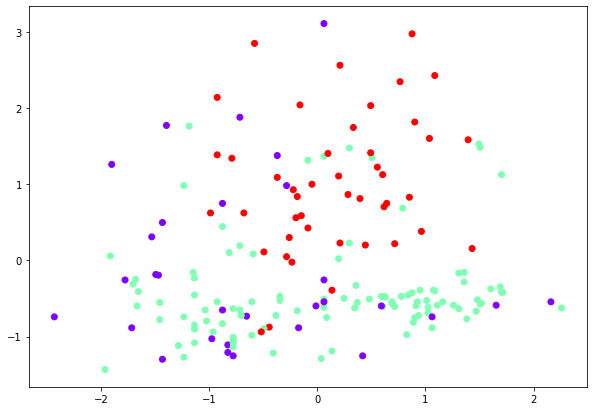

In [23]:
plt.figure(figsize=(10, 7))

plt.scatter(data_df1['alcohol'], data_df1['malic_acid'], c=dbscan.labels_, cmap='rainbow')

In [24]:
# DBSCAN with Dim reduction-PCA
from sklearn.cluster import DBSCAN
dbscan1=DBSCAN(eps=2.5,min_samples=8)
dbscan1.fit(X_r)

DBSCAN(eps=2.5, min_samples=8)

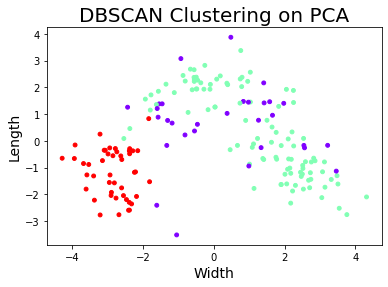

In [25]:
X1['DBSCAN_labels']=dbscan.labels_
# Plotting resulting clusters
plt.scatter(X_r[:, 0], X_r[:, 1],c=X1['DBSCAN_labels'],s=15,cmap='rainbow')
plt.title('DBSCAN Clustering on PCA',fontsize=20)
plt.xlabel('Width',fontsize=14)
plt.ylabel('Length',fontsize=14)
plt.show()

## Hierarchical clustering

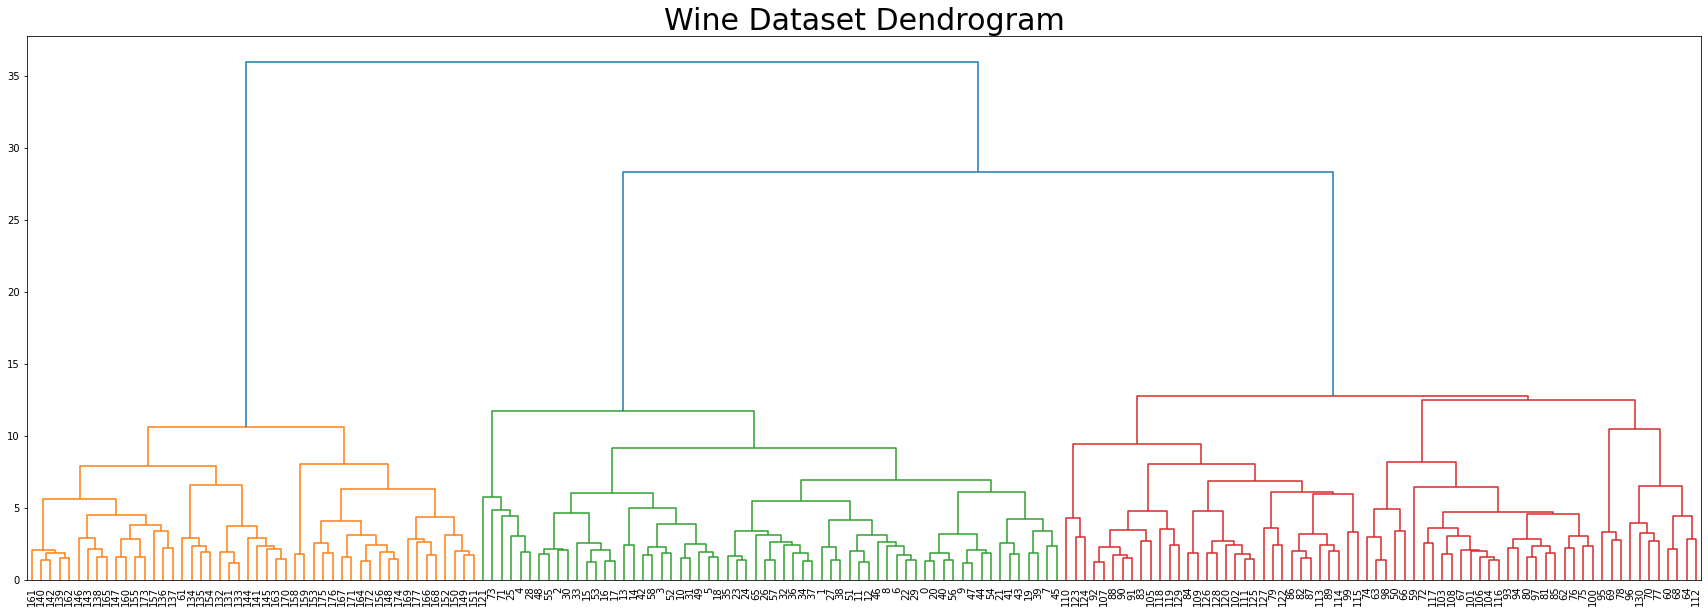

In [26]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

X=data_df1

plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'),labels=data_df1.index)
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Wine Dataset Dendrogram',fontsize=30)
#plt.xlabel('Car Sales',fontsize=20)
#plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

#without Dim Reduction

In [27]:
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

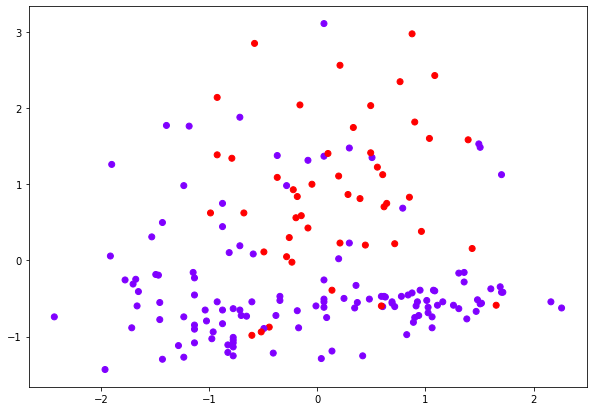

In [29]:
plt.figure(figsize=(10, 7))

plt.scatter(data_df1['alcohol'], data_df1['malic_acid'], c=hc.labels_, cmap='rainbow')

## With Dim Reduction

In [30]:
hc1 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc1 = hc1.fit_predict(X_r)

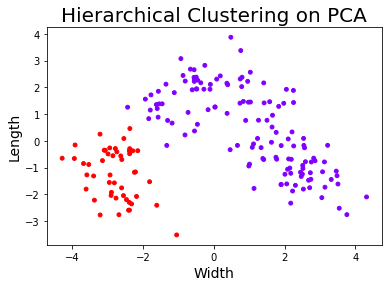

In [31]:
X1['hierarchical_labels']=hc1.labels_
# Plotting resulting clusters
plt.scatter(X_r[:, 0], X_r[:, 1],c=X1['hierarchical_labels'],s=15,cmap='rainbow')
plt.title('Hierarchical Clustering on PCA',fontsize=20)
plt.xlabel('Width',fontsize=14)
plt.ylabel('Length',fontsize=14)
plt.show()

Comparing the performance of the clustering techniques- K means, DBSCAN, Hierarchical- The dimensionality reduction techniques gives a better idea on the data as the visualization can be done in a lower dimension using the principal vectors.

Among the 3 models, the performance of K-means clustering method on the reduced features is good as the inter cluster center variance is high compared to all other models
